Code from https://www.quantstart.com/articles/Bayesian-Statistics-A-Beginners-Guide/

In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

In [3]:
# Create a list with the number of coin tosses. We start from 0 tosses and go till 500
num_trials = [0, 2, 10, 20, 50, 500]

# Toss the coin 500 trials & output the outcome into a list of 1s and 0s where 1 represents head 
data = stats.bernoulli.rvs(0.5, size = num_trials[-1])
data[:5] # Print the first five elements

array([1, 0, 0, 0, 0])

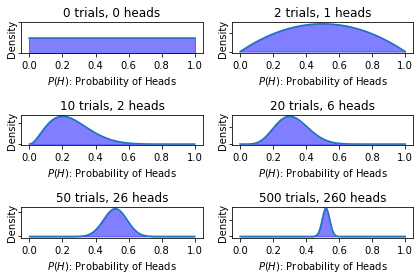

In [15]:
# Build x-axis with 100 plotting points
x = np.linspace(start=0, stop=1, num=100)

# Start looping over num_trials
for i, N in enumerate(num_trials):
    # Accumulate total number of Heads obtained for this Bayesian update
    heads = data[:N].sum()
    
    # Create subplot for each update
    ax = plt.subplot(len(num_trials)/2, 2, i+1)
    ax.set_title(f"{N} trials, {heads} heads")
    
    plt.xlabel("$P(H)$: Probability of Heads")
    plt.ylabel("Density")
    
    if i==0:
        plt.ylim([0.0, 2.0])
    plt.setp(ax.get_yticklabels(), visible=False)
    
    # Create & plot a Beta distribution to represent posterior belief of fairness of coin
    y = stats.beta.pdf(x, 1+heads, 1+N-heads)
    plt.plot(x, y, label=f"Observed {heads} heads in {N} tosses")
    plt.fill_between(x, y1=0, y2=y, color='blue', alpha=0.5)
    
plt.tight_layout()
plt.show()